
# Linear Regression on an Ecommerce Customer Data


The following data belongs to an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience  or their website. 



## Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [2]:
ecommerce_data = pd.read_csv(r'D:\documents\IBA\AAMD\Ecommerce Customers _1_')

In [3]:
ecommerce_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
ecommerce_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**


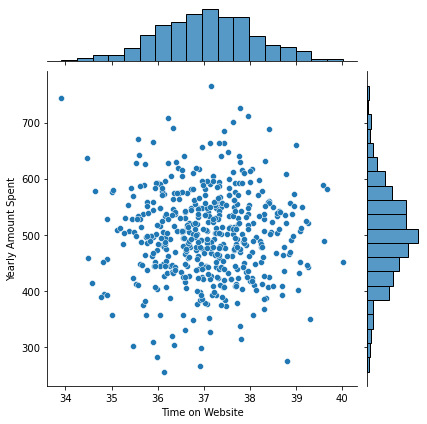

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data = ecommerce_data)

The correlation between Time on Website and Yearly Amount Spent does not make sense as shown in the scatterplot above. 

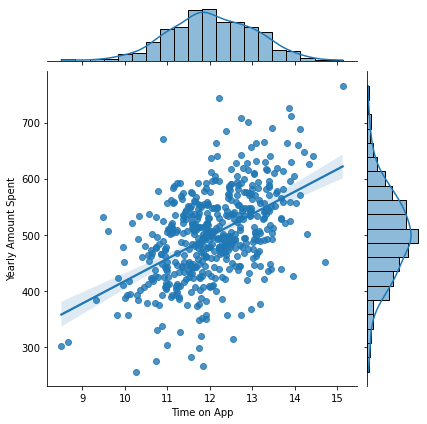

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data = ecommerce_data, kind = 'reg')

Time on App is positively correlated to Yearly Amount Spent.

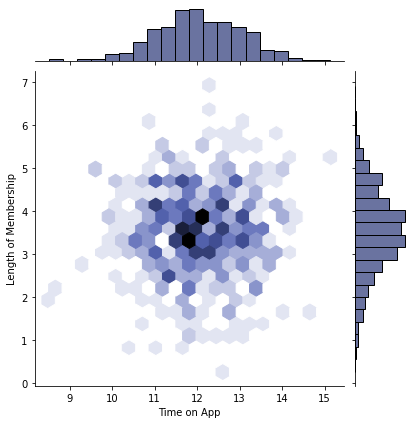

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', data = ecommerce_data, kind = 'hex', color= '#384480')

**Let's explore these types of relationships across the entire data set.**

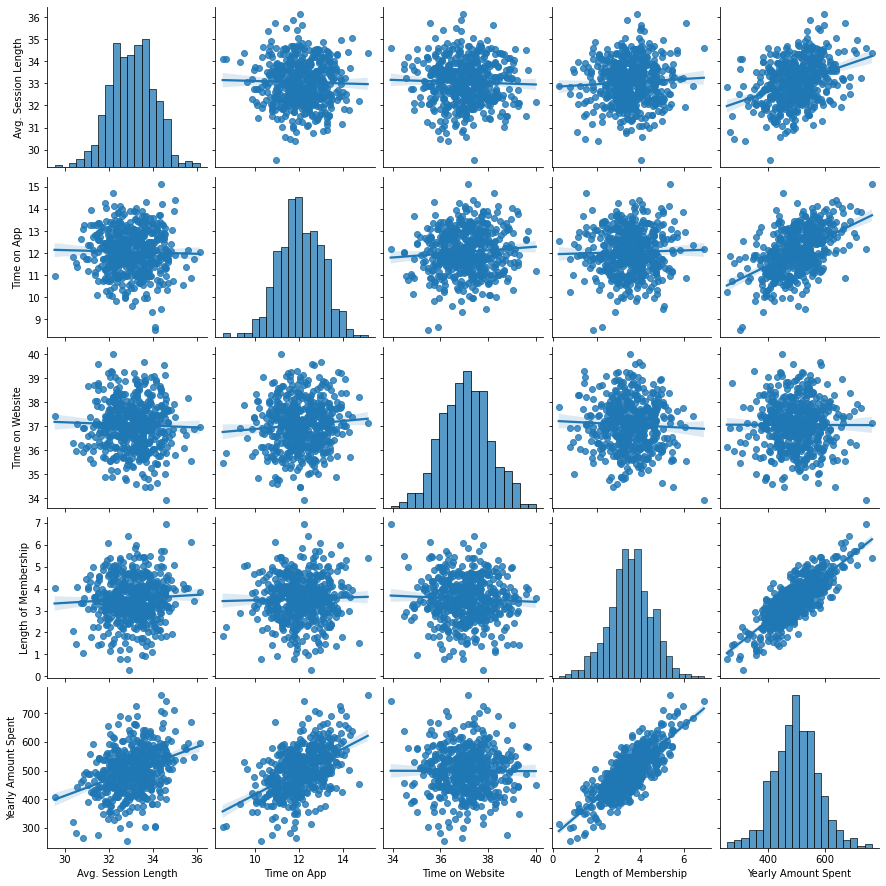

In [9]:
sns.pairplot(ecommerce_data, vars = ['Avg. Session Length','Time on App', 
                                     'Time on Website', 'Length of Membership', 'Yearly Amount Spent'], kind = 'reg' )

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

There is a positive correlation between Yearly Amount of Spent and Length of membership.
Yearly amount spent is also positively correlated to Time on App and Average Session Length. Length of Membership is most correlated feature with Yearly Amount Spent, but since the company has to  whether to focus their efforts on their mobile app experience or their website, Time on App is more correlated than Time on Website to Yearly Amount Spent.

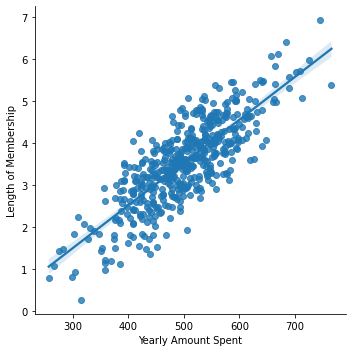

In [10]:
sns.lmplot(data = ecommerce_data, x = 'Yearly Amount Spent', y = 'Length of Membership')

**Linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [11]:
Y = ecommerce_data['Yearly Amount Spent']
print(Y)

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64


In [12]:
X = ecommerce_data.drop(['Email','Address', 'Avatar', 'Yearly Amount Spent'], axis = 1)
print(X)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497            32.646777    11.499409        38.332576              4.958264
498            33.322501    12.391423        36.840086              2.336485
499            33.715981    12.418808        35.771016              2.735160

[500 rows x 4 columns]


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.3, random_state=101)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
202            31.525752    11.340036        37.039514              3.811248
428            31.862741    14.039867        37.022269              3.738225
392            33.258238    11.514949        37.128039              4.662845
86             33.877779    12.517666        37.151921              2.669942
443            33.025020    12.504220        37.645839              4.051382
..                   ...          ...              ...                   ...
63             32.789773    11.670066        37.408748              3.414688
326            33.217188    10.999684        38.442767              4.243813
337            31.827979    12.461147        37.428997              2.974737
11             33.879361    11.584783        37.087926              3.713209
351            32.189845    11.386776        38.197483              4.808320

[350 rows x 4 columns]
     Avg. Session Length  Time on App  Time on Websi

## Training the Model

Now its time to train our model on our training data!

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

In [17]:
lm.fit(X_train,Y_train)

LinearRegression(n_jobs=1)

In [18]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [20]:
predictions = lm.predict(X_test)
print(predictions)

[456.44186104 402.72005312 409.2531539  591.4310343  590.01437275
 548.82396607 577.59737969 715.44428115 473.7893446  545.9211364
 337.8580314  500.38506697 552.93478041 409.6038964  765.52590754
 545.83973731 693.25969124 507.32416226 573.10533175 573.2076631
 397.44989709 555.0985107  458.19868141 482.66899911 559.2655959
 413.00946082 532.25727408 377.65464817 535.0209653  447.80070905
 595.54339577 667.14347072 511.96042791 573.30433971 505.02260887
 565.30254655 460.38785393 449.74727868 422.87193429 456.55615271
 598.10493696 449.64517443 615.34948995 511.88078685 504.37568058
 515.95249276 568.64597718 551.61444684 356.5552241  464.9759817
 481.66007708 534.2220025  256.28674001 505.30810714 520.01844434
 315.0298707  501.98080155 387.03842642 472.97419543 432.8704675
 539.79082198 590.03070739 752.86997652 558.27858232 523.71988382
 431.77690078 425.38411902 518.75571466 641.9667215  481.84855126
 549.69830187 380.93738919 555.18178277 403.43054276 472.52458887
 501.82927633 4

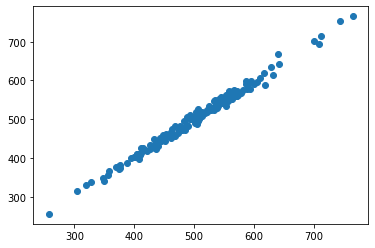

In [21]:
plt.scatter(Y_test,predictions)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [22]:
from sklearn import metrics

In [23]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('R2:', metrics.r2_score(Y_test, predictions))

MAE: 7.228148653430838
MSE: 79.81305165097451
RMSE: 8.933815066978637
R2: 0.9890046246741234


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

(array([1., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 4., 2., 2., 6., 7., 6.,
        7., 7., 7., 9., 8., 6., 6., 7., 9., 2., 7., 6., 3., 7., 5., 4., 5.,
        4., 1., 0., 2., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-26.95573072, -25.81664466, -24.67755861, -23.53847256,
        -22.3993865 , -21.26030045, -20.1212144 , -18.98212835,
        -17.84304229, -16.70395624, -15.56487019, -14.42578414,
        -13.28669808, -12.14761203, -11.00852598,  -9.86943992,
         -8.73035387,  -7.59126782,  -6.45218177,  -5.31309571,
         -4.17400966,  -3.03492361,  -1.89583755,  -0.7567515 ,
          0.38233455,   1.5214206 ,   2.66050666,   3.79959271,
          4.93867876,   6.07776481,   7.21685087,   8.35593692,
          9.49502297,  10.63410903,  11.77319508,  12.91228113,
         14.05136718,  15.19045324,  16.32953929,  17.46862534,
         18.6077114 ,  19.74679745,  20.8858835 ,  22.02496955,
         23.16405561,  24.30314166,  25.44222771,  26.58131376,
      

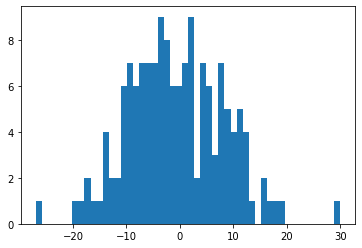

In [24]:
plt.hist((Y_test-predictions), bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [25]:
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


The coefficients indiciate that

- Keeping all the factors constant, a 1 unit increase in Average session length will result in $25.98 increase in yearly spent.

- Keeping all the factors constant, a 1 unit increase in Time on App will result in $38.59 increase in yearly spent.

- Keeping all the factors constant, a 1 unit increase in Time on Website will result in $0.19 increase in yearly spent.

- Keeping all the factors constant, a 1 unit increase in Length of membership will result in $61.28 increase in yearly spent.

The company should focus more on their mobile app because with an increase in app usage by 1 user will result in a $38.59 increase in revenue for the company, holding everything else constant.